In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from matplotlib import pyplot as plt
import torch

from grconvnet.dataloading.datasets import YCBSimulationData
from grconvnet.preprocessing import Preprocessor
from grconvnet.postprocessing import Postprocessor
from grconvnet.utils.processing import End2EndProcessor
from grconvnet.utils import visualization as viz
from grconvnet.utils.export import Exporter

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
dataset_path = Path("/home/moritz/Documents/ycb_sim_data_1")
dataset = YCBSimulationData(dataset_path)
sample = dataset[-1]
sample.name

'089_rubiks_cube'

In [3]:
resize = True

e2e_processor = End2EndProcessor(
    preprocessor=Preprocessor(
        mask_rgb_neg_color=torch.Tensor([255, 255, 255]),
        mask_rgb_pos_color=torch.Tensor([0, 0, 0]),
        resize=resize,
    ),
    postprocessor=Postprocessor(n_grasps=3),
)

In [4]:
process_data = e2e_processor(sample)
print(list(process_data.keys()))
print(list(process_data["preprocessor"].keys()))
print(list(process_data["postprocessor"].keys()))

['preprocessor', 'postprocessor', 'img2world_converter', 'model_input', 'sample', 'grasps_img', 'grasps_world']
['rgb_cropped', 'depth_cropped', 'seg_cropped', 'rgb_masked', 'rgb_norm', 'depth_norm']
['q_img', 'angle_img', 'width_img']


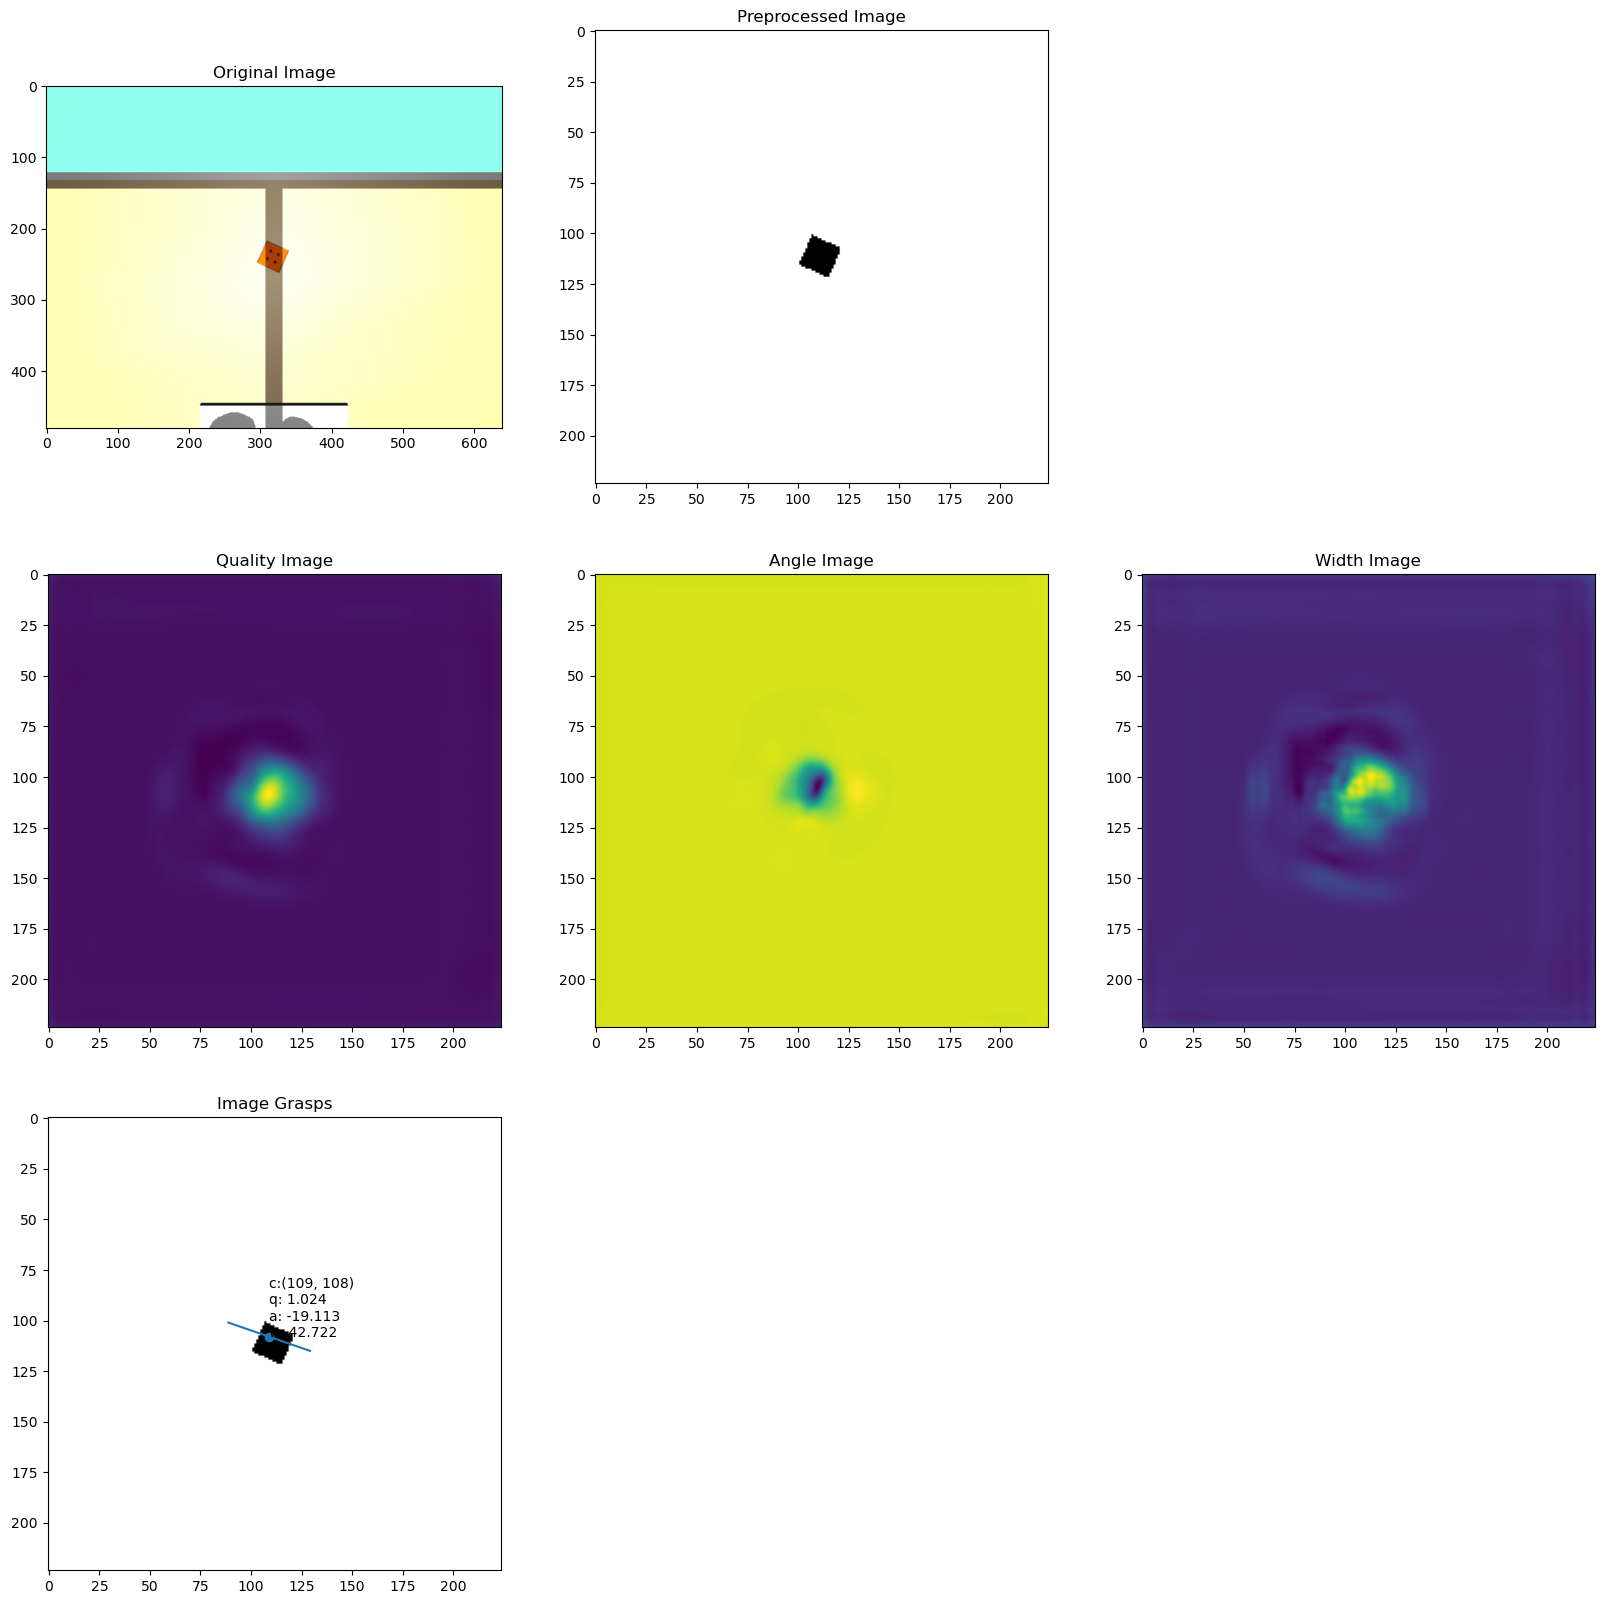

In [5]:
fig = viz.overview_fig(
    fig=plt.figure(figsize=(20,20)),
    original_rgb=viz.make_tensor_displayable(process_data["sample"].rgb, True, True),
    preprocessed_rgb=viz.make_tensor_displayable(process_data["preprocessor"]["rgb_masked"], True, True),
    q_img=viz.make_tensor_displayable(process_data["postprocessor"]["q_img"], False, False),
    angle_img=viz.make_tensor_displayable(process_data["postprocessor"]["angle_img"], False, False),
    width_img=viz.make_tensor_displayable(process_data["postprocessor"]["width_img"], False, False),
    image_grasps=process_data["grasps_img"],
)

plt.show()

In [6]:
export_data = {
    "rgb_cropped": process_data["preprocessor"]["rgb_cropped"],
    "depth_cropped": process_data["preprocessor"]["depth_cropped"],
    "rgb_masked": process_data["preprocessor"]["rgb_masked"],
    "q_img": process_data["postprocessor"]["q_img"],
    "angle_img": process_data["postprocessor"]["angle_img"],
    "width_img": process_data["postprocessor"]["width_img"],
    "grasps_img": process_data["grasps_img"],
    "grasps_world": process_data["grasps_world"],
    "model_input": process_data["model_input"],
    "overview": fig,
}

exporter = Exporter(export_dir=Path.cwd().parent / "grconvnet" / "results" / "test")
export_path = exporter(export_data, f"03_processing_ycb_{process_data['sample'].name}")